In [123]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import sys
import numpy.linalg as la
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns


In [124]:
def calculate_egein(norm_Lapl):
    w, v = np.linalg.eig(norm_Lapl)
    idx = np.argsort(w)
    w = w[idx]
    v = v[:,idx]
    print (w[0:1])
    print (v[0:1])
    return v[1]

In [125]:
def data_frame_from_vector(vector):
    return pd.DataFrame(data={'x': vector, 'y': 0})

In [126]:
np.set_printoptions(threshold=sys.maxsize)

nof_nodes = 200
radius = 0.125


G = nx.random_geometric_graph(nof_nodes, radius)
# G = nx.complete_multipartite_graph(5,5,5)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, "pos")

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))


In [143]:
L = nx.laplacian_matrix(G)
A = nx.convert_matrix.to_numpy_array(G)
DergeeList = list(G.degree)
D = np.zeros((nof_nodes, nof_nodes))

for node in range(len(DergeeList)):
    D[node][node] = DergeeList[node][1]
Lap = D - A
second_vector = calculate_egein(L.A)
print (second_vector)
label_vector = np.zeros(len(second_vector))
median = np.median(second_vector)
print ("median: ")
print (median)
label_vector[second_vector>median]=1
label_vector[second_vector<=median]=0
color_map = []
for i in label_vector:
    if i == 0:
        color_map.append('red')
    else:
        color_map.append('green')
options = {"node_color": "C0", "node_size": 100}
print (label_vector)


[-5.41537227e-16]
[[-7.07106781e-02 -1.46916507e-02 -1.42628915e-01 -1.11401958e-01
  -4.60662739e-02  2.34455579e-03 -1.00519662e-01 -1.67130892e-02
   9.05511168e-02  2.00623831e-02 -1.35872043e-02  2.11229835e-02
   2.60213860e-03  6.49334698e-02  4.98243651e-02  2.73154551e-02
   4.40565799e-03  2.69417178e-02 -7.22211298e-02  7.72607548e-02
   1.43869421e-02  2.63906795e-02  3.76855647e-03  1.89204817e-02
   5.64303539e-03 -2.77736835e-02 -3.71514976e-02  4.85864144e-02
   7.92876447e-02  2.15185645e-01  1.82088935e-02 -1.68774603e-02
   8.13984504e-02 -6.25341693e-02 -1.08430909e-02 -8.98570387e-04
   5.91939190e-03  4.26824909e-03  7.28209571e-02 -2.75669695e-02
  -3.89721186e-04  7.19150452e-02 -1.69848611e-01  1.08421164e-02
  -2.03676072e-02  3.56405409e-03 -1.61614140e-02 -2.64518281e-02
   6.51411053e-02 -4.19381674e-02  3.64155444e-02  2.20376634e-03
   7.40238980e-16 -2.48731410e-16 -1.81563500e-15 -5.78381040e-03
   1.74673607e-01 -2.32726310e-01  1.24296921e-01  7.10761

In [144]:
L_norm = nx.normalized_laplacian_matrix(G)
evals = np.linalg.eigvals(L_norm.A)

#eigenValues, eigenVectors = linalg.eigL(L_norm.A)

# idx = eigenValues.argsort()[::-1]   
#eigenValues = eigenValues[idx]
# eigenVectors = eigenVectors[:,idx]



In [145]:
# k_means = KMeans(random_state=25, n_clusters=3)
# data_df = data_frame_from_vector(second_vector)
# k_means.fit(data_df)
# cluster = k_means.predict(data_df)

# cluster = ['k-means_c_' + str(c) for c in cluster]

# fig, ax = plt.subplots()
# sns.scatterplot(x='x', y='y', data=data_df.assign(cluster = cluster), hue='cluster', ax=ax)
# ax.set(title='K-Means Clustering');

In [146]:
print("Adjacent matrix: \n")
print (A)
print("Degree matrix: \n")
print (D)
print("Laplacina matrix: \n")
print (Lap)
print ("Eigen values: \n")
print (evals)

  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  -1.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  8.
   0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.
   0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   8.  0.  0.  0.  0.  0.  0

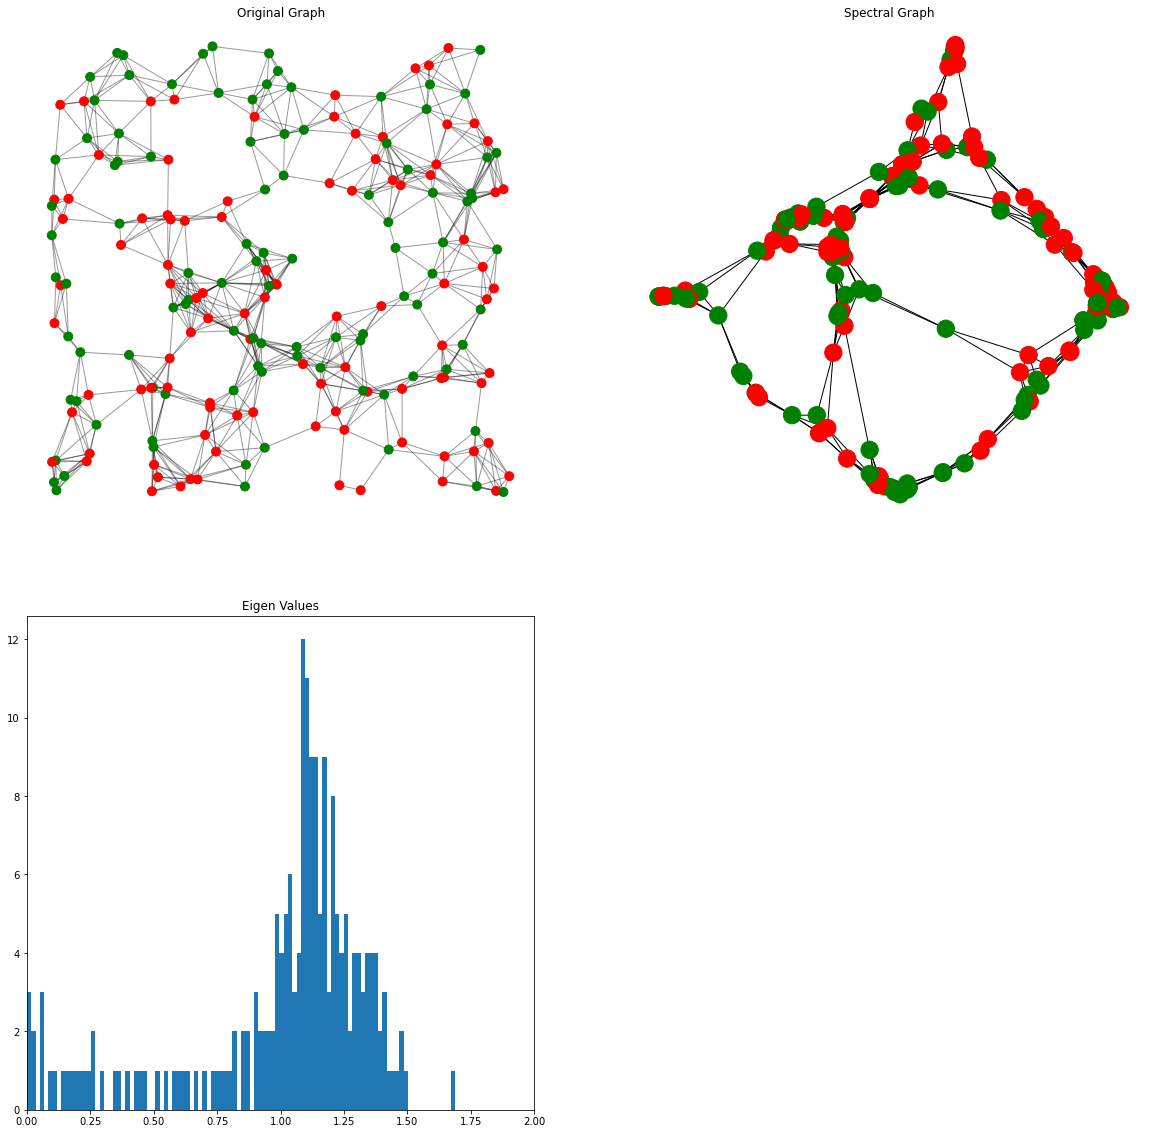

In [147]:
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.title("Original Graph")
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=80,
    node_color=color_map,
    cmap=plt.cm.Reds_r,
)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.subplot(222)
plt.title("Spectral Graph")
nx.draw_spectral(G,node_color=color_map)
plt.subplot(223)
plt.title("Eigen Values")
plt.hist(evals, bins=100)  # histogram with 100 bins
plt.xlim(0, 2)  # eigenvalues between 0 and 2
plt.show()